In [2]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# (Optional) For Boruta
# If not installed, do: pip install boruta
from boruta import BorutaPy

# -------------------------------
# 1) Load Data
# -------------------------------
file_path = r'C:\Users\Χρήστος\Desktop\Aviation_Project\Preprocessed_file.csv'
data = pd.read_csv(file_path, encoding='latin1')

# -------------------------------
# 2) Define Targets & Categories
# -------------------------------
target_columns = [
    "SA_1_understanding_job_roles",
    "SA_2_understanding_job_roles",
    "SA_3_understanding_job_roles",
    "SA_4_understanding_job_roles",
    "SA_5_understanding_job_roles",
    "SA_6_teamwork_in_emergencies",
    "SA_7_teamwork_in_emergencies",
    "SA_8_teamwork_in_emergencies",
    "SA_9_teamwork_in_emergencies",
    "SA_10_teamwork_in_emergencies",
    "SA_11_teamwork_and_communication",
    "SA_12_teamwork_and_communication",
    "SA_13_teamwork_and_communication",
    "SA_14_teamwork_and_communication",
    "SA_15_teamwork_and_communication",
    "SA_16R_teamwork_and_communication",
    "SA_17_teamwork_and_communication",
    "SA_18_teamwork_and_communication",
    "SA_19_teamwork_and_communication",
    "SA_20_teamwork_and_communication",
    "SA_21_teamwork_and_communication",
    "SA_22R_teamwork_and_communication",
    "SA_23_teamwork_and_communication",
    "SA_24_teamwork_and_communication",
    "SA_25_teamwork_and_communication",
    "SA_26_clear_communication_within_team",
    "SA_27_clear_communication_within_team",
    "SA_28_clear_communication_within_team",
    "SA_29_clear_communication_within_team",
    "SA_30_clear_communication_within_team",
    "SA_31_clear_communication_within_team",
    "SA_32_clear_communication_within_team",
    "SA_33_clear_communication_within_team",
    "SA_34R_clear_communication_within_team"
]

# Example category definitions (not used directly in the code below for feature importance):
categories = {
    "Understanding of job roles": [
        "SA_1_understanding_job_roles",
        "SA_2_understanding_job_roles",
        "SA_3_understanding_job_roles",
        "SA_4_understanding_job_roles",
        "SA_5_understanding_job_roles"
    ],
    "Teamwork in emergencies": [
        "SA_6_teamwork_in_emergencies",
        "SA_7_teamwork_in_emergencies",
        "SA_8_teamwork_in_emergencies",
        "SA_9_teamwork_in_emergencies",
        "SA_10_teamwork_in_emergencies"
    ],
    "Overall importance of effective teamwork and communication": [
        "SA_11_teamwork_and_communication",
        "SA_12_teamwork_and_communication",
        "SA_13_teamwork_and_communication",
        "SA_14_teamwork_and_communication",
        "SA_15_teamwork_and_communication",
        "SA_16R_teamwork_and_communication",
        "SA_17_teamwork_and_communication",
        "SA_18_teamwork_and_communication",
        "SA_19_teamwork_and_communication",
        "SA_20_teamwork_and_communication",
        "SA_21_teamwork_and_communication",
        "SA_22R_teamwork_and_communication",
        "SA_23_teamwork_and_communication",
        "SA_24_teamwork_and_communication",
        "SA_25_teamwork_and_communication"
    ],
    "Importance of clear communication within the maintenance team": [
        "SA_26_clear_communication_within_team",
        "SA_27_clear_communication_within_team",
        "SA_28_clear_communication_within_team",
        "SA_29_clear_communication_within_team",
        "SA_30_clear_communication_within_team",
        "SA_31_clear_communication_within_team",
        "SA_32_clear_communication_within_team",
        "SA_33_clear_communication_within_team",
        "SA_34R_clear_communication_within_team"
    ]
}

# -------------------------------
# 3) Separate Input & Output
# -------------------------------
X = data.drop(columns=target_columns)
y = data[target_columns]  # This is multi-output

# If you want to demonstrate feature importance for just ONE target, 
# pick a single column (e.g., 'SA_1_understanding_job_roles'):
# y_single = data['SA_1_understanding_job_roles']

# -------------------------------
# 4) Train-Test Split
# -------------------------------
# For demonstration, let's just pick one target to illustrate 
# how to get feature importance. (Multi-output feature importance is trickier.)
y_single = data['SA_1_understanding_job_roles']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_single, test_size=0.2, random_state=42
)

# -------------------------------
# 5) Scale Features
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


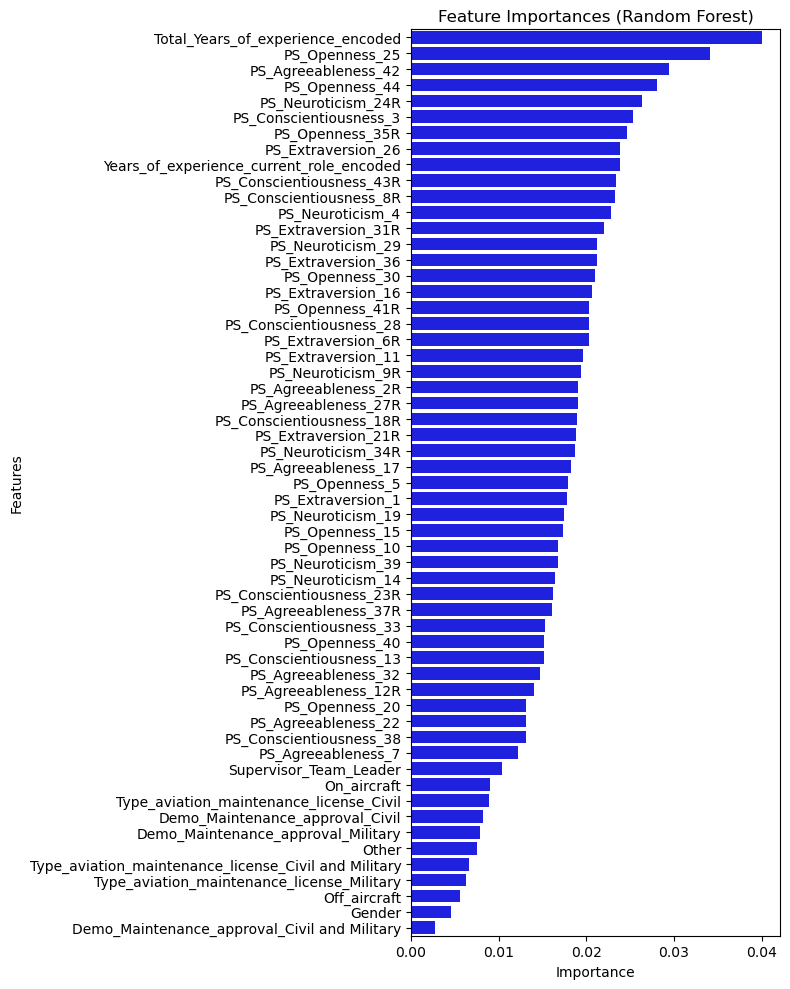

In [10]:
# -------------------------------
# Random Forest Feature Importance
# -------------------------------
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train_scaled, y_train)

importances_rf = rf.feature_importances_
feature_names = X.columns  # same order as X_train columns

# Sort features by importance
indices_rf = np.argsort(importances_rf)[::-1]
sorted_features_rf = feature_names[indices_rf]
sorted_importances_rf = importances_rf[indices_rf]

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(8, 10))
sns.barplot(x=sorted_importances_rf, y=sorted_features_rf, color='blue')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


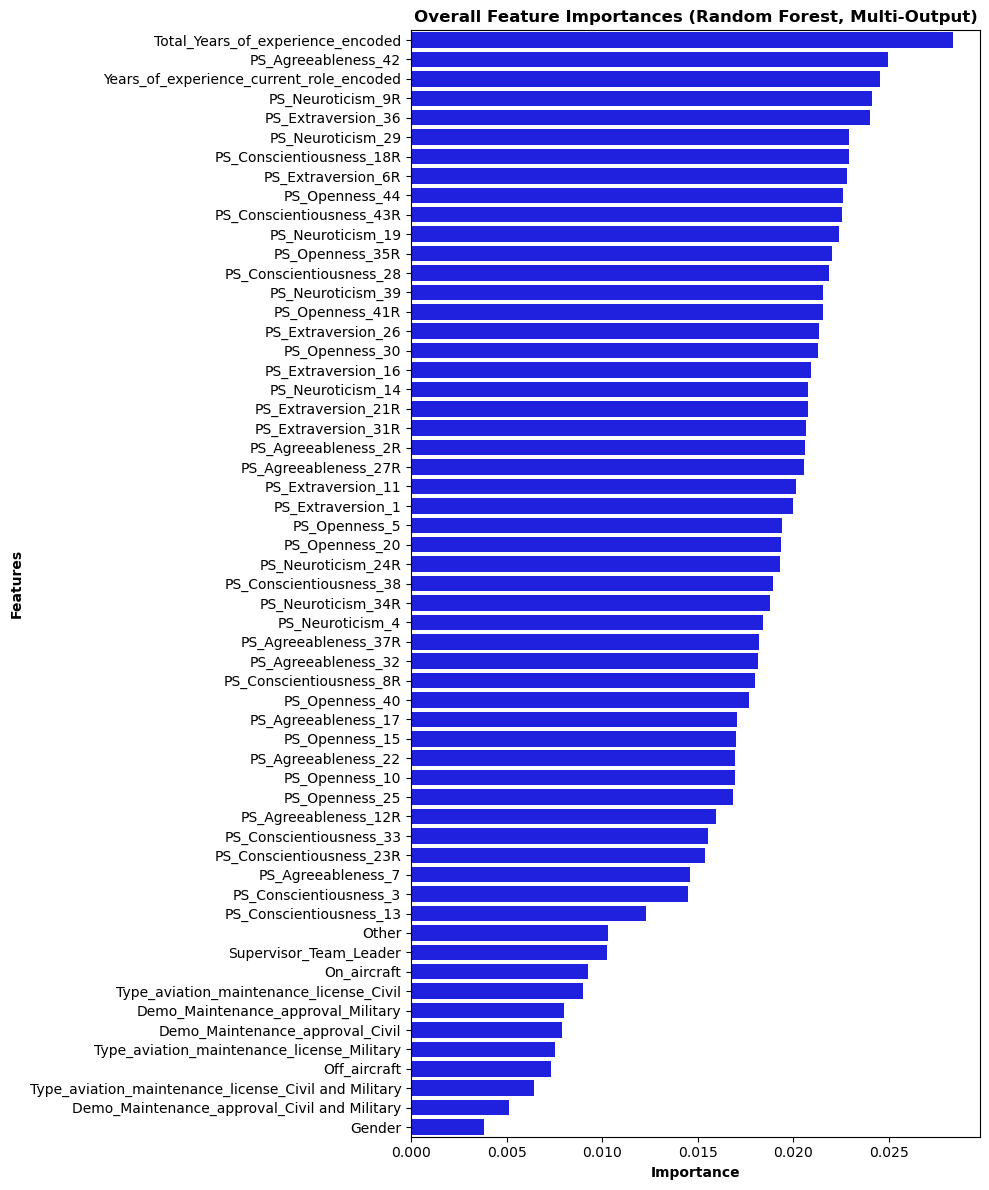

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1) Load Data
# -------------------------------
file_path = r'C:\Users\Χρήστος\Desktop\Aviation_Project\Preprocessed_file.csv'
data = pd.read_csv(file_path, encoding='latin1')

# -------------------------------
# 2) Define Targets & Categories
# -------------------------------
target_columns = [
    "SA_1_understanding_job_roles",
    "SA_2_understanding_job_roles",
    "SA_3_understanding_job_roles",
    "SA_4_understanding_job_roles",
    "SA_5_understanding_job_roles",
    "SA_6_teamwork_in_emergencies",
    "SA_7_teamwork_in_emergencies",
    "SA_8_teamwork_in_emergencies",
    "SA_9_teamwork_in_emergencies",
    "SA_10_teamwork_in_emergencies",
    "SA_11_teamwork_and_communication",
    "SA_12_teamwork_and_communication",
    "SA_13_teamwork_and_communication",
    "SA_14_teamwork_and_communication",
    "SA_15_teamwork_and_communication",
    "SA_16R_teamwork_and_communication",
    "SA_17_teamwork_and_communication",
    "SA_18_teamwork_and_communication",
    "SA_19_teamwork_and_communication",
    "SA_20_teamwork_and_communication",
    "SA_21_teamwork_and_communication",
    "SA_22R_teamwork_and_communication",
    "SA_23_teamwork_and_communication",
    "SA_24_teamwork_and_communication",
    "SA_25_teamwork_and_communication",
    "SA_26_clear_communication_within_team",
    "SA_27_clear_communication_within_team",
    "SA_28_clear_communication_within_team",
    "SA_29_clear_communication_within_team",
    "SA_30_clear_communication_within_team",
    "SA_31_clear_communication_within_team",
    "SA_32_clear_communication_within_team",
    "SA_33_clear_communication_within_team",
    "SA_34R_clear_communication_within_team"
]

# (The categories below are for reference and not directly used in the modeling code.)
categories = {
    "Understanding of job roles": [
        "SA_1_understanding_job_roles",
        "SA_2_understanding_job_roles",
        "SA_3_understanding_job_roles",
        "SA_4_understanding_job_roles",
        "SA_5_understanding_job_roles"
    ],
    "Teamwork in emergencies": [
        "SA_6_teamwork_in_emergencies",
        "SA_7_teamwork_in_emergencies",
        "SA_8_teamwork_in_emergencies",
        "SA_9_teamwork_in_emergencies",
        "SA_10_teamwork_in_emergencies"
    ],
    "Overall importance of effective teamwork and communication": [
        "SA_11_teamwork_and_communication",
        "SA_12_teamwork_and_communication",
        "SA_13_teamwork_and_communication",
        "SA_14_teamwork_and_communication",
        "SA_15_teamwork_and_communication",
        "SA_16R_teamwork_and_communication",
        "SA_17_teamwork_and_communication",
        "SA_18_teamwork_and_communication",
        "SA_19_teamwork_and_communication",
        "SA_20_teamwork_and_communication",
        "SA_21_teamwork_and_communication",
        "SA_22R_teamwork_and_communication",
        "SA_23_teamwork_and_communication",
        "SA_24_teamwork_and_communication",
        "SA_25_teamwork_and_communication"
    ],
    "Importance of clear communication within the maintenance team": [
        "SA_26_clear_communication_within_team",
        "SA_27_clear_communication_within_team",
        "SA_28_clear_communication_within_team",
        "SA_29_clear_communication_within_team",
        "SA_30_clear_communication_within_team",
        "SA_31_clear_communication_within_team",
        "SA_32_clear_communication_within_team",
        "SA_33_clear_communication_within_team",
        "SA_34R_clear_communication_within_team"
    ]
}

# -------------------------------
# 3) Separate Input & Multi-Output Target
# -------------------------------
X = data.drop(columns=target_columns)
y = data[target_columns]  # Multi-output target

# -------------------------------
# 4) Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 5) Scale Features
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 6) Multi-output Random Forest Classification
# -------------------------------
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train_scaled, y_train)

# Note: In multi-output classification, feature_importances_ is an average over all targets.
importances_rf = rf.feature_importances_
feature_names = X.columns

# Sort features by importance (highest first)
indices_rf = np.argsort(importances_rf)[::-1]
sorted_features_rf = feature_names[indices_rf]
sorted_importances_rf = importances_rf[indices_rf]

# -------------------------------
# 7) Visualization of Feature Importances
# -------------------------------
plt.figure(figsize=(10, 12))
sns.barplot(x=sorted_importances_rf, y=sorted_features_rf, color='blue')
plt.title("Overall Feature Importances (Random Forest, Multi-Output)", fontweight='bold')
plt.xlabel("Importance", fontweight='bold')
plt.ylabel("Features", fontweight='bold')
plt.tight_layout()
plt.show()


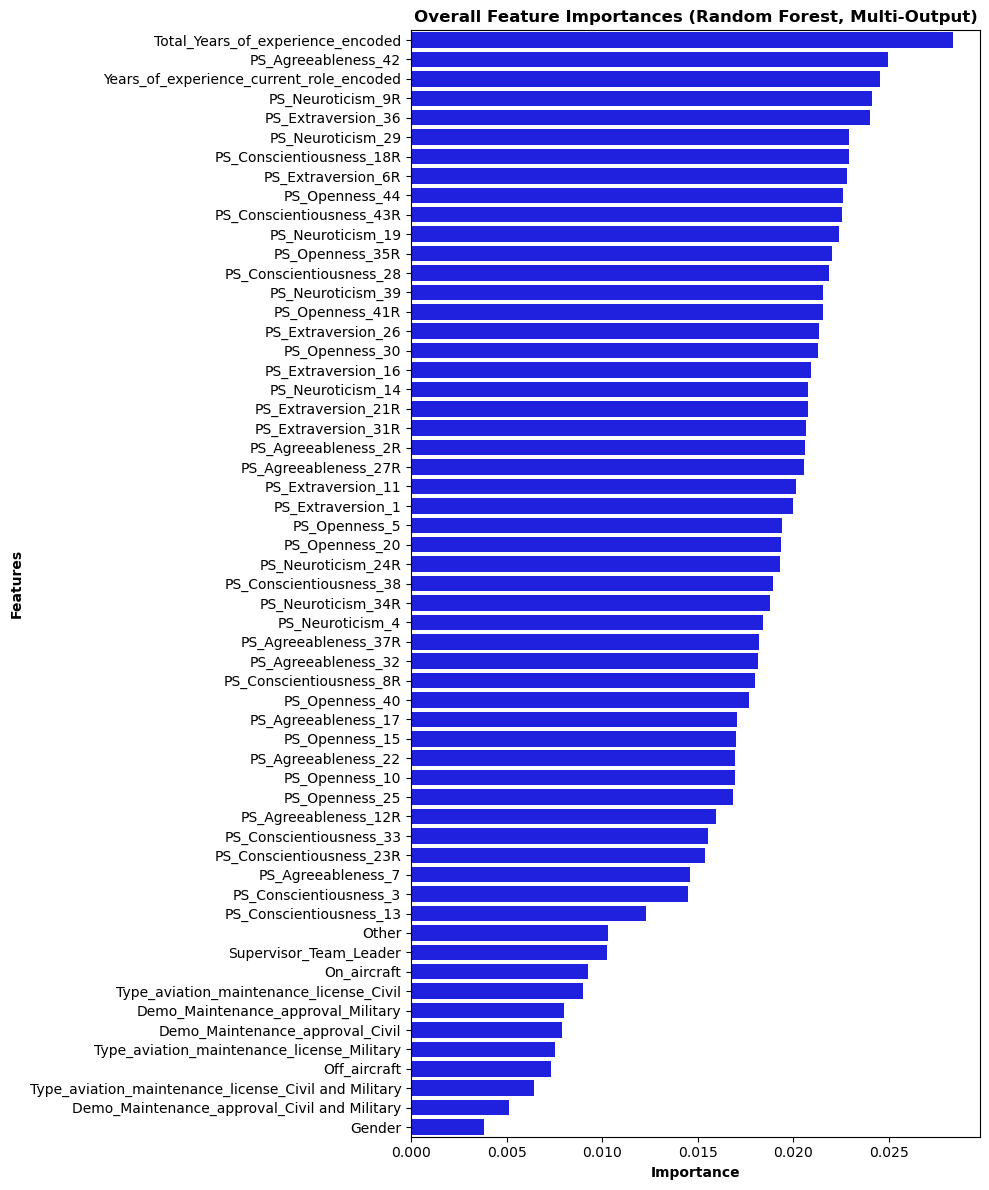

Top 10 Most Important Features:
Total_Years_of_experience_encoded: 0.0283
PS_Agreeableness_42: 0.0249
Years_of_experience_current_role_encoded: 0.0245
PS_Neuroticism_9R: 0.0241
PS_Extraversion_36: 0.0240
PS_Neuroticism_29: 0.0229
PS_Conscientiousness_18R: 0.0229
PS_Extraversion_6R: 0.0228
PS_Openness_44: 0.0226
PS_Conscientiousness_43R: 0.0226
Aggregated Feature Importances by Category:
                   Total Importance
Openness                   0.194558
Extraversion               0.170580
Neuroticism                0.168242
Agreeableness              0.167034
Conscientiousness          0.161894
Demographics               0.137691

The most important category is: Openness


C:\Users\emexi\AppData\Local\Temp\ipykernel_22312\2239183752.py:221: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total Importance', data=df_cat_importances_reset,


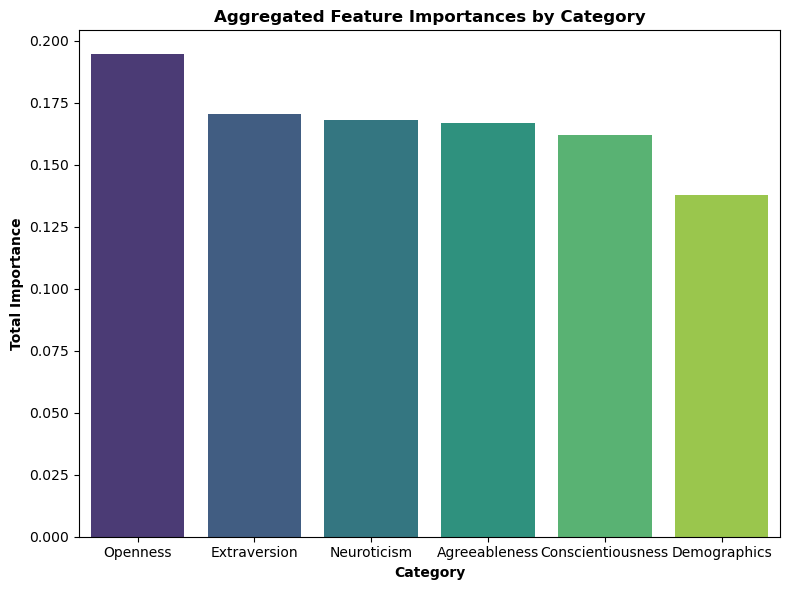

C:\Users\emexi\AppData\Local\Temp\ipykernel_22312\2239183752.py:248: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=df_demo, palette='Blues_d')


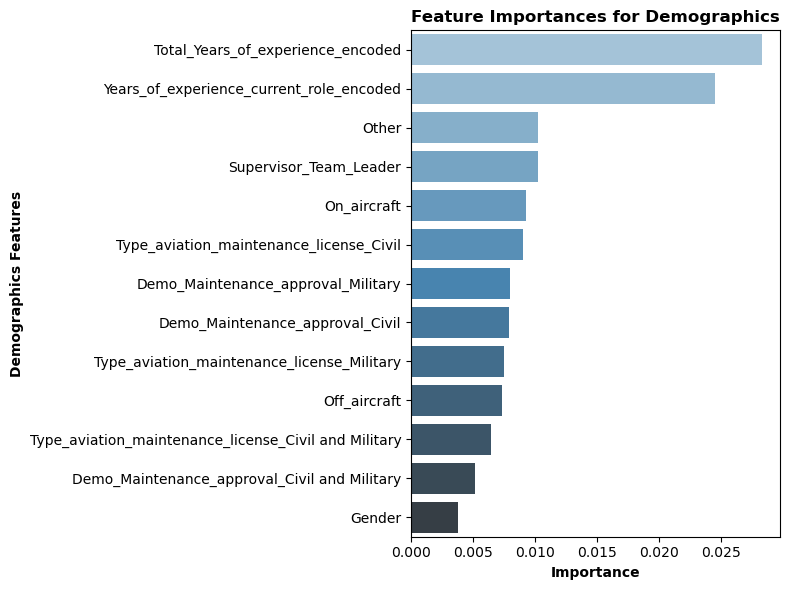

Table of Demographics Feature Importances:
                                              Feature  Importance
                            Total Years of experience    0.028336
                  Years of experience in current role    0.024533
                     Other technical/engineering work    0.010277
                               Supervisor-Team Leader    0.010232
                               Work Area: On aircraft    0.009239
                   Civil aviation maintenance license    0.009003
              Approval for Military of Civil Aircraft    0.007976
           Approval for Maintenance of Civil Aircraft    0.007882
                Military aviation maintenance license    0.007513
                              Work Area: Off aircraft    0.007297
      Civil and Military aviation maintenance license    0.006452
Approval for Maintenance of Civil & Military Aircraft    0.005130
                                               Gender    0.003823


C:\Users\emexi\AppData\Local\Temp\ipykernel_22312\2239183752.py:295: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=df_demo, palette='viridis')


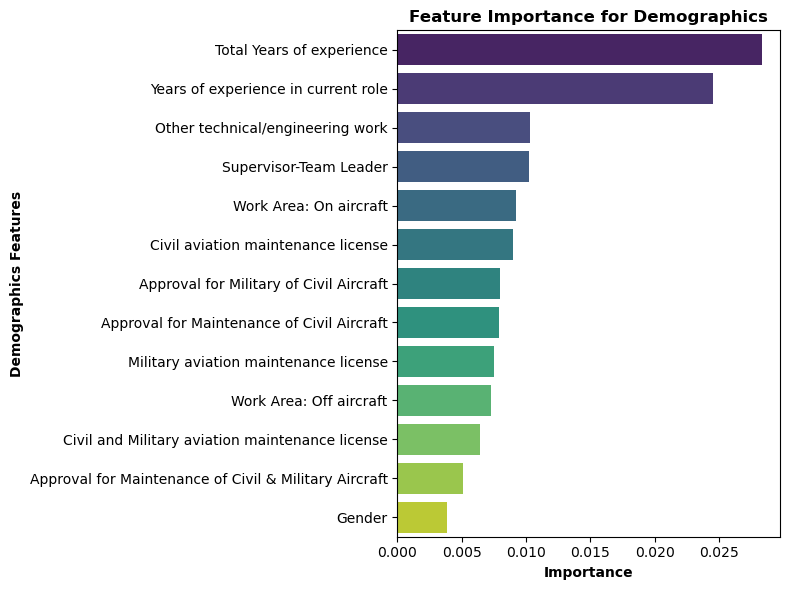

C:\Users\emexi\AppData\Local\Temp\ipykernel_22312\2239183752.py:314: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total Importance', data=df_personality, palette='viridis')


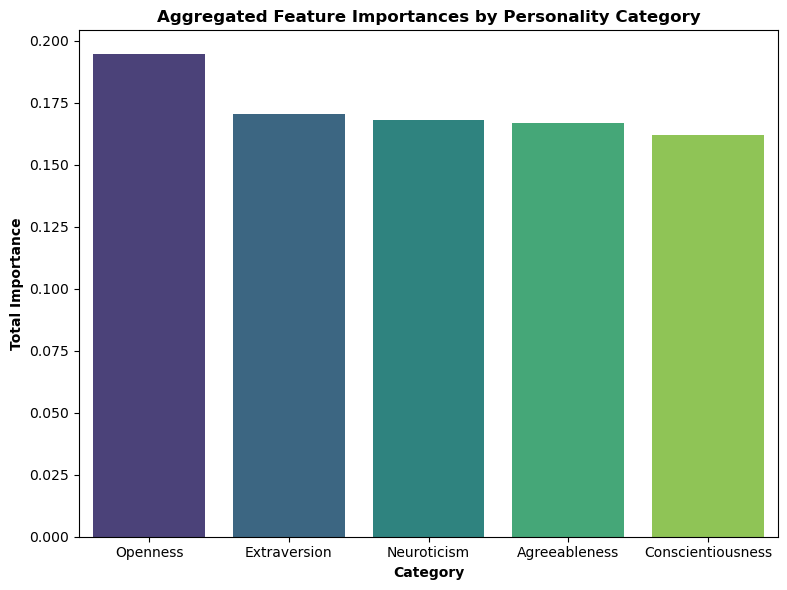

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1) Load Data
# -------------------------------
file_path = r'C:\Users\emexi\Desktop\Aviation_Project\Preprocessed_file.csv'
data = pd.read_csv(file_path, encoding='latin1')

# -------------------------------
# 2) Define Target Columns & Input Feature Categories
# -------------------------------
target_columns = [
    "SA_1_understanding_job_roles",
    "SA_2_understanding_job_roles",
    "SA_3_understanding_job_roles",
    "SA_4_understanding_job_roles",
    "SA_5_understanding_job_roles",
    "SA_6_teamwork_in_emergencies",
    "SA_7_teamwork_in_emergencies",
    "SA_8_teamwork_in_emergencies",
    "SA_9_teamwork_in_emergencies",
    "SA_10_teamwork_in_emergencies",
    "SA_11_teamwork_and_communication",
    "SA_12_teamwork_and_communication",
    "SA_13_teamwork_and_communication",
    "SA_14_teamwork_and_communication",
    "SA_15_teamwork_and_communication",
    "SA_16R_teamwork_and_communication",
    "SA_17_teamwork_and_communication",
    "SA_18_teamwork_and_communication",
    "SA_19_teamwork_and_communication",
    "SA_20_teamwork_and_communication",
    "SA_21_teamwork_and_communication",
    "SA_22R_teamwork_and_communication",
    "SA_23_teamwork_and_communication",
    "SA_24_teamwork_and_communication",
    "SA_25_teamwork_and_communication",
    "SA_26_clear_communication_within_team",
    "SA_27_clear_communication_within_team",
    "SA_28_clear_communication_within_team",
    "SA_29_clear_communication_within_team",
    "SA_30_clear_communication_within_team",
    "SA_31_clear_communication_within_team",
    "SA_32_clear_communication_within_team",
    "SA_33_clear_communication_within_team",
    "SA_34R_clear_communication_within_team"
]

# Define the input feature categories (update these lists to match your dataset column names exactly)
feature_categories = {
    "Demographics": [
        "Gender",
        "Total_Years_of_experience_encoded",
        "Years_of_experience_current_role_encoded",
        "Type_aviation_maintenance_license_Civil",
        "Type_aviation_maintenance_license_Civil and Military",
        "Type_aviation_maintenance_license_Military",
        "Demo_Maintenance_approval_Civil",
        "Demo_Maintenance_approval_Civil and Military",
        "Demo_Maintenance_approval_Military",
        "Supervisor_Team_Leader",
        "On_aircraft",
        "Off_aircraft",
        "Other"
    ],
    "Extraversion": [
        "PS_Extraversion_1",
        "PS_Extraversion_6R",
        "PS_Extraversion_11",
        "PS_Extraversion_16",
        "PS_Extraversion_21R",
        "PS_Extraversion_26",
        "PS_Extraversion_31R",
        "PS_Extraversion_36"
    ],
    "Agreeableness": [
        "PS_Agreeableness_2R",
        "PS_Agreeableness_7",
        "PS_Agreeableness_12R",
        "PS_Agreeableness_17",
        "PS_Agreeableness_22",
        "PS_Agreeableness_27R",
        "PS_Agreeableness_32",
        "PS_Agreeableness_37R",
        "PS_Agreeableness_42"
    ],
    "Conscientiousness": [
        "PS_Conscientiousness_3",
        "PS_Conscientiousness_8R",
        "PS_Conscientiousness_13",
        "PS_Conscientiousness_18R",
        "PS_Conscientiousness_23R",
        "PS_Conscientiousness_28",
        "PS_Conscientiousness_33",
        "PS_Conscientiousness_38",
        "PS_Conscientiousness_43R"
    ],
    "Openness": [
        "PS_Openness_5",
        "PS_Openness_10",
        "PS_Openness_15",
        "PS_Openness_20",
        "PS_Openness_25",
        "PS_Openness_30",
        "PS_Openness_35R",
        "PS_Openness_40",
        "PS_Openness_41R",
        "PS_Openness_44"
    ],
    "Neuroticism": [
        "PS_Neuroticism_4",
        "PS_Neuroticism_9R",
        "PS_Neuroticism_14",
        "PS_Neuroticism_19",
        "PS_Neuroticism_24R",
        "PS_Neuroticism_29",
        "PS_Neuroticism_34R",
        "PS_Neuroticism_39"
    ]
}

# -------------------------------
# 3) Separate Input & Multi-Output Target
# -------------------------------
X = data.drop(columns=target_columns)
y = data[target_columns]  # Multi-output target

# -------------------------------
# 4) Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 5) Scale Features
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 6) Train Multi-output Random Forest Model
# -------------------------------
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train_scaled, y_train)

# For multi-output classification, feature_importances_ is averaged over all targets.
importances_rf = rf.feature_importances_
feature_names = X.columns

# -------------------------------
# 7) (Optional) Visualize Overall Feature Importances
# -------------------------------
indices_rf = np.argsort(importances_rf)[::-1]
sorted_features_rf = feature_names[indices_rf]
sorted_importances_rf = importances_rf[indices_rf]

plt.figure(figsize=(10, 12))
sns.barplot(x=sorted_importances_rf, y=sorted_features_rf, color='blue')
plt.title("Overall Feature Importances (Random Forest, Multi-Output)", fontweight='bold')
plt.xlabel("Importance", fontweight='bold')
plt.ylabel("Features", fontweight='bold')
plt.tight_layout()
plt.show()

# -------------------------------
# 7.1) Print Top 10 Most Important Features
# -------------------------------
top10_features = sorted_features_rf[:10]
top10_importances = sorted_importances_rf[:10]

print("Top 10 Most Important Features:")
for feature, importance in zip(top10_features, top10_importances):
    print(f"{feature}: {importance:.4f}")

# -------------------------------
# 8) Aggregate Feature Importances by Category
# -------------------------------
category_importances = {}

for category, features in feature_categories.items():
    # Only include features that exist in the dataset
    valid_features = [f for f in features if f in feature_names]
    if valid_features:
        # Get the indices of these features in X.columns
        indices = [feature_names.get_loc(f) for f in valid_features]
        # Mean of the importances of these features
        total_importance = importances_rf[indices].sum()
        category_importances[category] = total_importance
    else:
        category_importances[category] = 0.0

# Convert to DataFrame for easier handling and visualization
df_cat_importances = pd.DataFrame.from_dict(category_importances, orient='index', columns=['Total Importance'])
df_cat_importances = df_cat_importances.sort_values(by='Total Importance', ascending=False)

print("Aggregated Feature Importances by Category:")
print(df_cat_importances)

# -------------------------------
# 9) Determine and Display the Most Important Category
# -------------------------------
most_important_category = df_cat_importances['Total Importance'].idxmax()
print(f"\nThe most important category is: {most_important_category}")

# -------------------------------
# 10) Visualize Aggregated Category Importances
# -------------------------------
# Reset the index to have a 'Category' column for seaborn's barplot
df_cat_importances_reset = df_cat_importances.reset_index().rename(columns={'index': 'Category'})

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Total Importance', data=df_cat_importances_reset,
            palette='viridis', dodge=False)
plt.title("Aggregated Feature Importances by Category", fontweight='bold')
plt.xlabel("Category", fontweight='bold')
plt.ylabel("Total Importance", fontweight='bold')
plt.tight_layout()
plt.show()

# -----------------------------------------------
# Additional Visualization: Demographics Features
# -----------------------------------------------

# Extract only the Demographics features
demographics_features = feature_categories.get("Demographics", [])
# Only consider features that are present in the dataset
valid_demo_features = [f for f in demographics_features if f in feature_names]
# Get indices and corresponding importances for these features
demo_indices = [feature_names.get_loc(f) for f in valid_demo_features]
demo_importances = importances_rf[demo_indices]

# Create a DataFrame for easier plotting
df_demo = pd.DataFrame({
    "Feature": valid_demo_features,
    "Importance": demo_importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=df_demo, palette='Blues_d')
plt.title("Feature Importances for Demographics", fontweight='bold')
plt.xlabel("Importance", fontweight='bold')
plt.ylabel("Demographics Features", fontweight='bold')
plt.tight_layout()
plt.show()

# -----------------------------------------------
# Additional Visualization: Demographics Features
# -----------------------------------------------

# Mapping for renaming Demographics features
demo_rename_map = {
    "Gender": "Gender",
    "Total_Years_of_experience_encoded": "Total Years of experience",
    "Years_of_experience_current_role_encoded": "Years of experience in current role",
    "Type_aviation_maintenance_license_Civil": "Civil aviation maintenance license",
    "Type_aviation_maintenance_license_Civil and Military": "Civil and Military aviation maintenance license",
    "Type_aviation_maintenance_license_Military": "Military aviation maintenance license",
    "Demo_Maintenance_approval_Civil": "Approval for Maintenance of Civil Aircraft",
    "Demo_Maintenance_approval_Civil and Military": "Approval for Maintenance of Civil & Military Aircraft",
    "Demo_Maintenance_approval_Military": "Approval for Military of Civil Aircraft",
    "Supervisor_Team_Leader": "Supervisor-Team Leader",
    "On_aircraft": "Work Area: On aircraft",
    "Off_aircraft": "Work Area: Off aircraft",
    "Other": "Other technical/engineering work"
}

# Extract only the Demographics features
demographics_features = feature_categories.get("Demographics", [])
# Only consider features that are present in the dataset
valid_demo_features = [f for f in demographics_features if f in feature_names]
# Get indices and corresponding importances for these features
demo_indices = [feature_names.get_loc(f) for f in valid_demo_features]
demo_importances = importances_rf[demo_indices]

# Create a DataFrame for easier plotting, applying the renaming mapping
df_demo = pd.DataFrame({
    "Feature": [demo_rename_map.get(f, f) for f in valid_demo_features],
    "Importance": demo_importances
}).sort_values(by="Importance", ascending=False)

# Print the table with Demographics feature importances
print("Table of Demographics Feature Importances:")
print(df_demo.to_string(index=False))

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=df_demo, palette='viridis')
plt.title("Feature Importance for Demographics", fontweight='bold')
plt.xlabel("Importance", fontweight='bold')
plt.ylabel("Demographics Features", fontweight='bold')
plt.tight_layout()
plt.show()


# -----------------------------------------------------------
# Additional Visualization: Aggregated Importances for Personality
# -----------------------------------------------------------
# Exclude Demographics from the aggregated category importances
personality_categories = {cat: imp for cat, imp in category_importances.items() if cat != "Demographics"}

# Convert to DataFrame for visualization
df_personality = pd.DataFrame.from_dict(personality_categories, orient='index', columns=['Total Importance'])
df_personality = df_personality.sort_values(by='Total Importance', ascending=False).reset_index().rename(columns={'index': 'Category'})

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Total Importance', data=df_personality, palette='viridis')
plt.title("Aggregated Feature Importances by Personality Category", fontweight='bold')
plt.xlabel("Category", fontweight='bold')
plt.ylabel("Total Importance", fontweight='bold')
plt.tight_layout()
plt.show()




Demographics Trait Importances:
                                               Trait  Importance
                   Total_Years_of_experience_encoded    0.028336
            Years_of_experience_current_role_encoded    0.024533
                                               Other    0.010277
                              Supervisor_Team_Leader    0.010232
                                         On_aircraft    0.009239
             Type_aviation_maintenance_license_Civil    0.009003
                  Demo_Maintenance_approval_Military    0.007976
                     Demo_Maintenance_approval_Civil    0.007882
          Type_aviation_maintenance_license_Military    0.007513
                                        Off_aircraft    0.007297
Type_aviation_maintenance_license_Civil and Military    0.006452
        Demo_Maintenance_approval_Civil and Military    0.005130
                                              Gender    0.003823

Extraversion Trait Importances:
              Trait  Imp

C:\Users\emexi\AppData\Local\Temp\ipykernel_22312\1170440216.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Trait", data=df, palette='coolwarm')


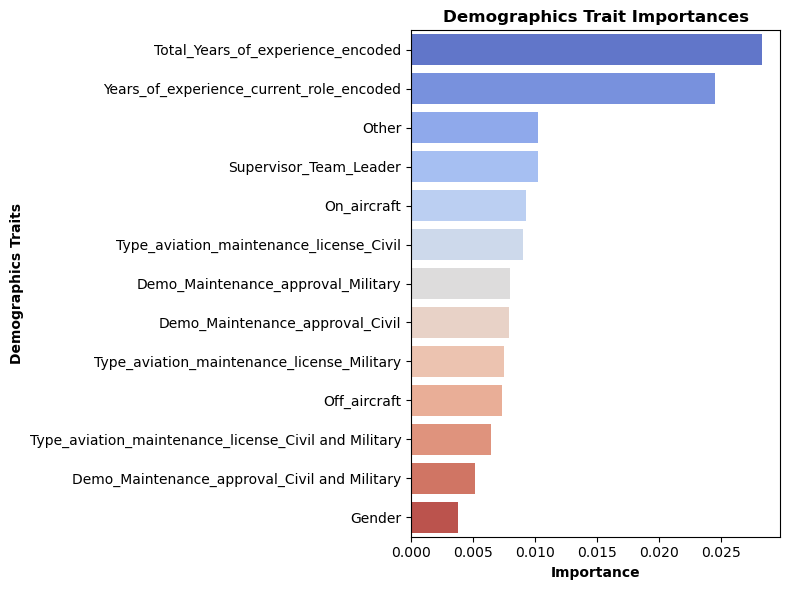

C:\Users\emexi\AppData\Local\Temp\ipykernel_22312\1170440216.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Trait", data=df, palette='coolwarm')


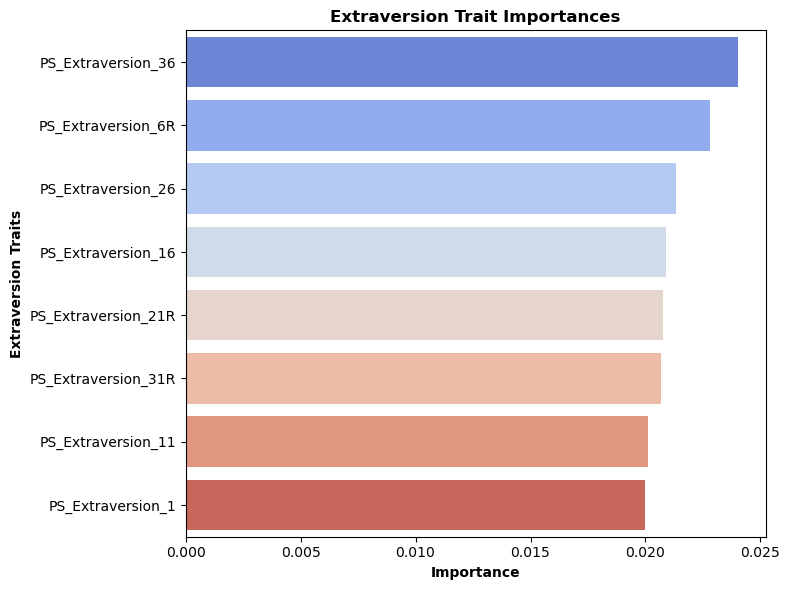

C:\Users\emexi\AppData\Local\Temp\ipykernel_22312\1170440216.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Trait", data=df, palette='coolwarm')


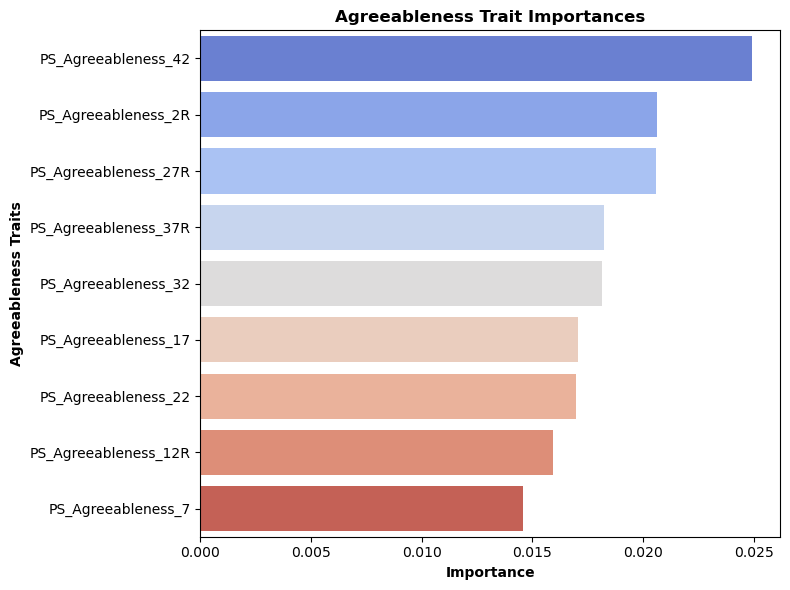

C:\Users\emexi\AppData\Local\Temp\ipykernel_22312\1170440216.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Trait", data=df, palette='coolwarm')


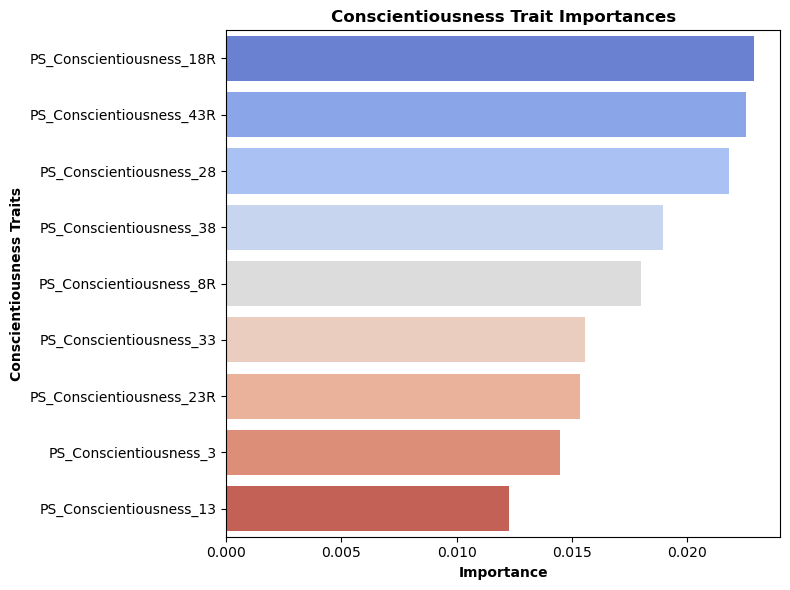

C:\Users\emexi\AppData\Local\Temp\ipykernel_22312\1170440216.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Trait", data=df, palette='coolwarm')


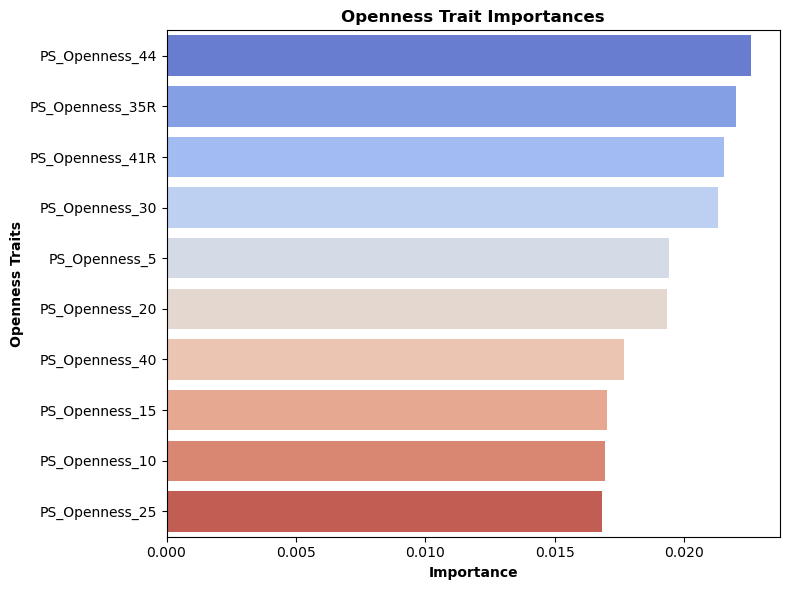

C:\Users\emexi\AppData\Local\Temp\ipykernel_22312\1170440216.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Trait", data=df, palette='coolwarm')


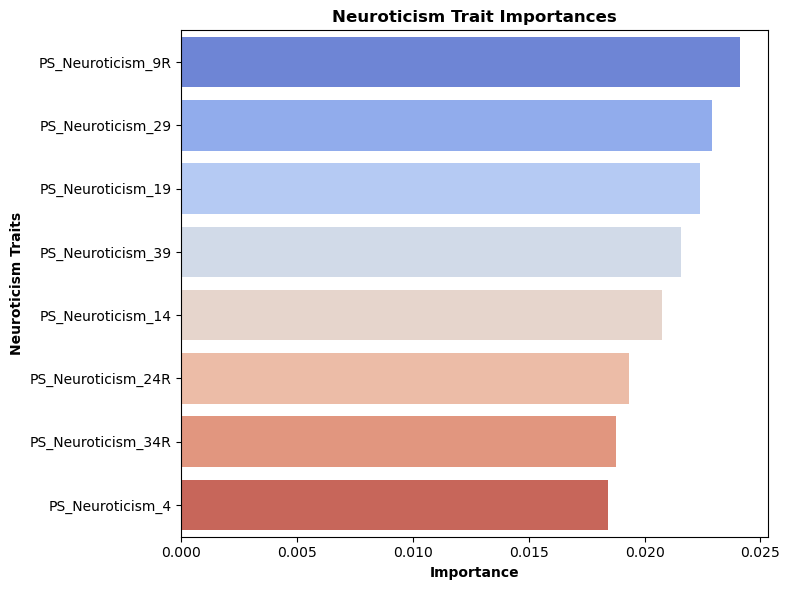

In [8]:
# -----------------------------------------------
# Additional Calculation: Individual Trait Importances by Category
# -----------------------------------------------
# Create a dictionary to store DataFrames for each category's traits
traits_importance = {}

# Loop over each category in feature_categories
for category, traits in feature_categories.items():
    # Filter out traits not present in the dataset columns
    valid_traits = [trait for trait in traits if trait in feature_names]
    
    # If there are valid traits, compute their indices and importances
    if valid_traits:
        indices = [feature_names.get_loc(trait) for trait in valid_traits]
        trait_importances = importances_rf[indices]
        
        # Create a DataFrame to display individual trait importances
        df_traits = pd.DataFrame({
            'Trait': valid_traits,
            'Importance': trait_importances
        }).sort_values(by='Importance', ascending=False)
        
        traits_importance[category] = df_traits
    else:
        traits_importance[category] = pd.DataFrame(columns=['Trait', 'Importance'])

# -------------------------------
# 1) Print the Individual Trait Importances by Category
# -------------------------------
for category, df in traits_importance.items():
    print(f"\n{category} Trait Importances:")
    if not df.empty:
        print(df.to_string(index=False))
    else:
        print("No valid traits found in the dataset for this category.")

# -------------------------------
# 2) Visualize the Individual Trait Importances
# -------------------------------
# Create a separate figure for each category
for category, df in traits_importance.items():
    if not df.empty:
        plt.figure(figsize=(8, 6))
        sns.barplot(x="Importance", y="Trait", data=df, palette='coolwarm')
        plt.title(f"{category} Trait Importances", fontweight='bold')
        plt.xlabel("Importance", fontweight='bold')
        plt.ylabel(f"{category} Traits", fontweight='bold')
        plt.tight_layout()
        plt.show()


Aggregated Feature Importance Statistics by Category:
                   Avg Importance       Std       Min       Max
Extraversion             0.021323  0.001312  0.019961  0.024026
Neuroticism              0.021030  0.001941  0.018425  0.024110
Openness                 0.019456  0.002153  0.016825  0.022569
Agreeableness            0.018559  0.002922  0.014569  0.024937
Conscientiousness        0.017988  0.003624  0.012287  0.022884
Demographics             0.010592  0.007023  0.003823  0.028336


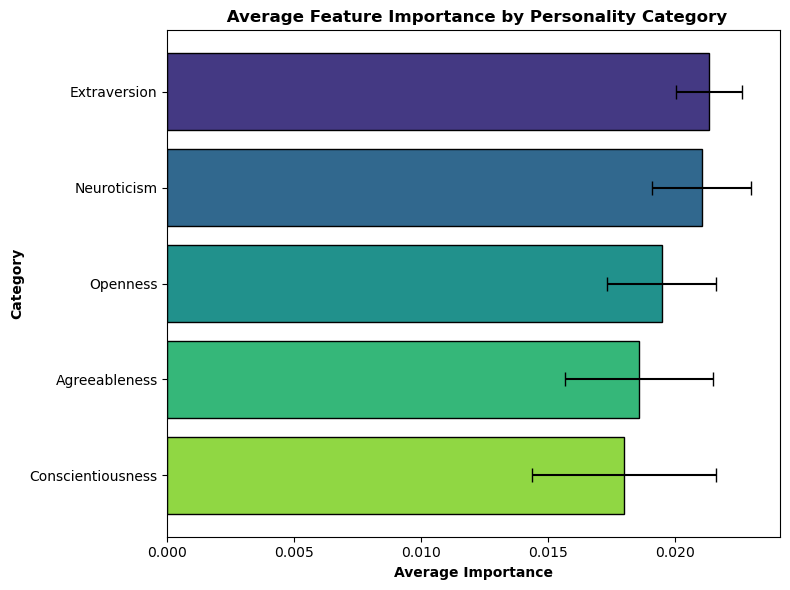

In [5]:
# -------------------------------
# 8) Aggregate Feature Importances by Category (Average, Std, Min & Max)
# -------------------------------
category_stats = {}
for category, features in feature_categories.items():
    # Only include features that exist in the dataset
    valid_features = [f for f in features if f in feature_names]
    if valid_features:
        # Get the indices of these features in X.columns
        indices = [feature_names.get_loc(f) for f in valid_features]
        # Compute average, standard deviation, min, and max of the importances
        avg_importance = importances_rf[indices].mean()
        std_importance = importances_rf[indices].std()
        min_importance = importances_rf[indices].min()
        max_importance = importances_rf[indices].max()
        category_stats[category] = {
            'Avg Importance': avg_importance,
            'Std': std_importance,
            'Min': min_importance,
            'Max': max_importance
        }
    else:
        category_stats[category] = {'Avg Importance': 0.0, 'Std': 0.0, 'Min': 0.0, 'Max': 0.0}

# Convert to DataFrame for easier handling and visualization
df_cat_stats = pd.DataFrame.from_dict(category_stats, orient='index')
df_cat_stats = df_cat_stats.sort_values(by='Avg Importance', ascending=False)

print("Aggregated Feature Importance Statistics by Category:")
print(df_cat_stats)

# -------------------------------
# 10) Visualize Aggregated Category Importances for Personality Categories Only
# -------------------------------
# Exclude the 'Demographics' category
df_personality_stats = df_cat_stats.drop(index="Demographics", errors='ignore')

fig, ax = plt.subplots(figsize=(8, 6))
# Create positions for each bar along the y-axis
y_positions = np.arange(len(df_personality_stats))
# Generate colors using the 'viridis' palette
colors = sns.color_palette("viridis", len(df_personality_stats))
# Plot horizontal bars with error bars (using the standard deviation)
ax.barh(y_positions, df_personality_stats['Avg Importance'], 
        xerr=df_personality_stats['Std'], capsize=5, 
        color=colors, edgecolor='black')
# Set y-tick labels to the category names, displayed horizontally
ax.set_yticks(y_positions)
ax.set_yticklabels(df_personality_stats.index)
ax.set_title(" Average Feature Importance by Personality Category", fontweight='bold')
ax.set_xlabel("Average Importance", fontweight='bold')
ax.set_ylabel("Category", fontweight='bold')

# Invert the y-axis so the highest average importance appears at the top
ax.invert_yaxis()

plt.tight_layout()
plt.show()


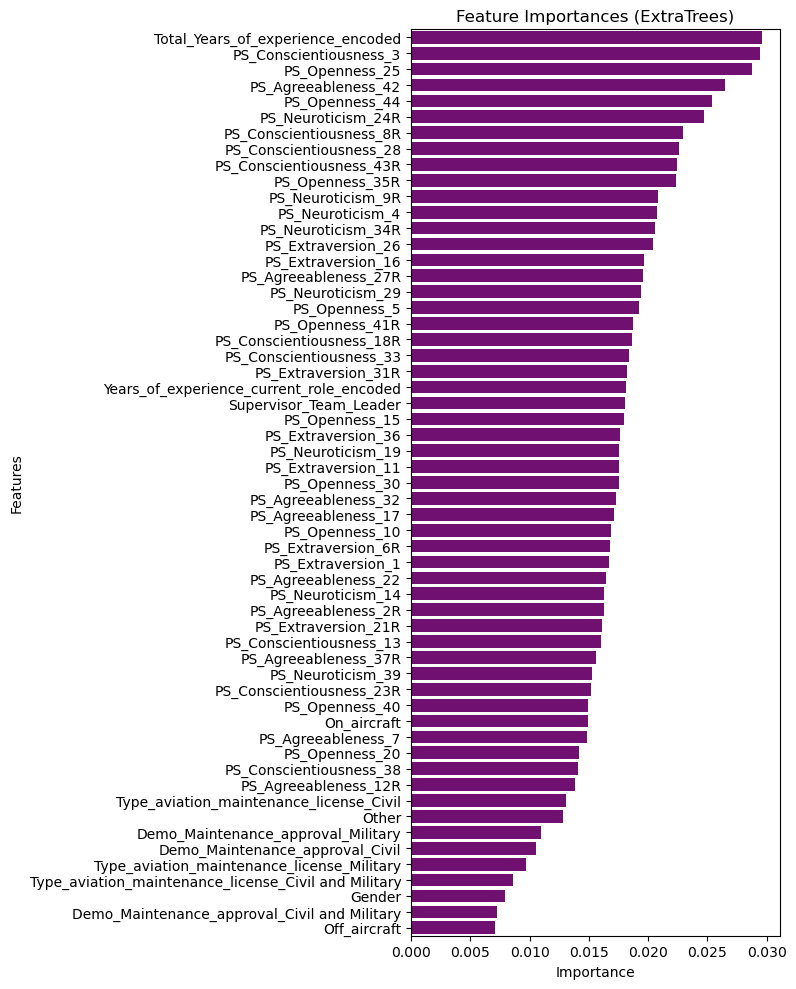

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

# 1. Fit ExtraTrees
et = ExtraTreesClassifier(n_estimators=500, random_state=42)
et.fit(X_train_scaled, y_train)

# 2. Extract and sort feature importances
importances_et = et.feature_importances_
indices_et = np.argsort(importances_et)[::-1]
sorted_features_et = feature_names[indices_et]
sorted_importances_et = importances_et[indices_et]

# 3. Visualize
plt.figure(figsize=(8, 10))
sns.barplot(x=sorted_importances_et, y=sorted_features_et, color='purple')
plt.title("Feature Importances (ExtraTrees)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


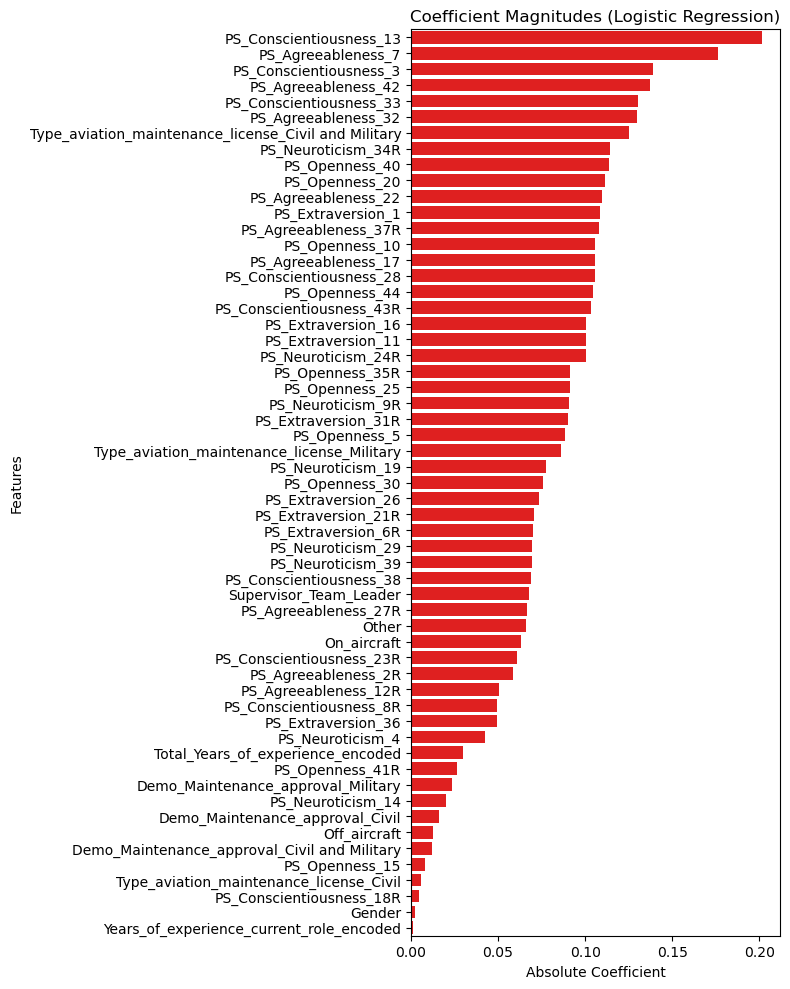

In [12]:
from sklearn.linear_model import LogisticRegression

# 1. Fit Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# 2. Compute absolute coefficient values
feature_names = np.array(X.columns)

coefficients = lr.coef_[0]           # For a single target
importances_lr = np.abs(coefficients)
indices_lr = np.argsort(importances_lr)[::-1]
sorted_features_lr = feature_names[indices_lr]
sorted_importances_lr = importances_lr[indices_lr]

# 3. Visualize
plt.figure(figsize=(8, 10))
sns.barplot(x=sorted_importances_lr, y=sorted_features_lr, color='red')
plt.title("Coefficient Magnitudes (Logistic Regression)")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


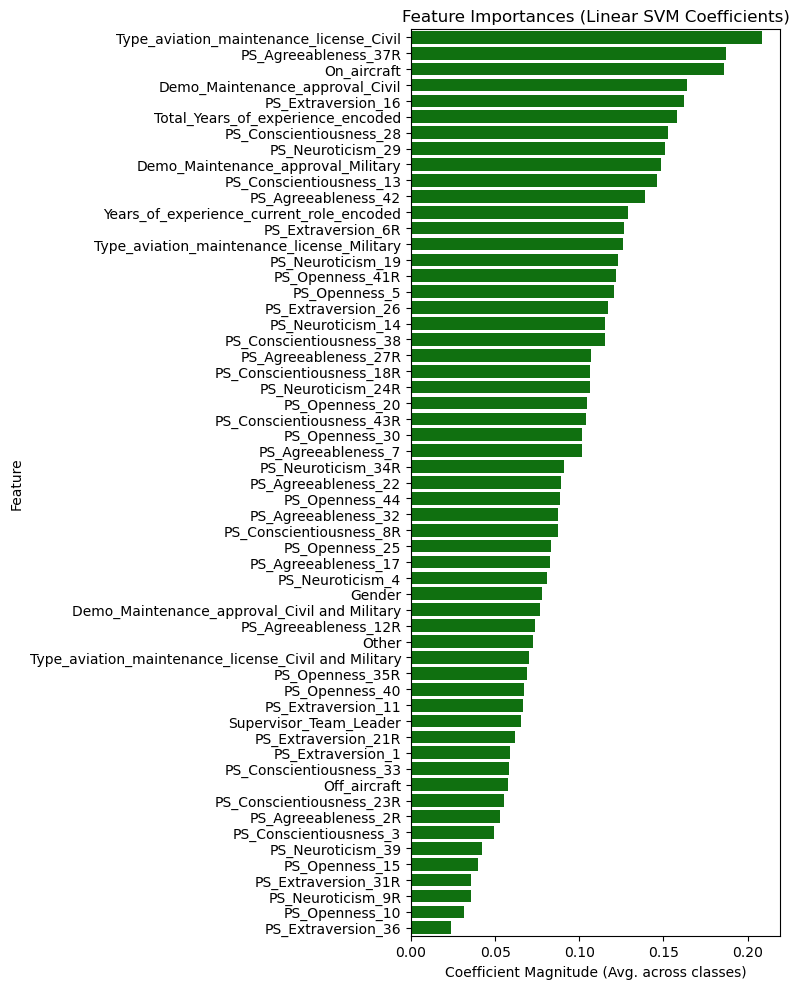

In [6]:
# -------------------------------
# Linear SVM Feature Importance
# -------------------------------
svc = LinearSVC(random_state=42, max_iter=10000)
svc.fit(X_train_scaled, y_train)

# For binary classification, there's only one set of coefficients:
# For multi-class, each class has a set of coefficients; we can average them.
if len(svc.coef_.shape) > 1:
    # Multi-class case
    importance_svc = np.mean(np.abs(svc.coef_), axis=0)
else:
    # Binary case
    importance_svc = np.abs(svc.coef_).ravel()

feature_names = X.columns
indices_svc = np.argsort(importance_svc)[::-1]
sorted_features_svc = feature_names[indices_svc]
sorted_importances_svc = importance_svc[indices_svc]

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(8, 10))
sns.barplot(x=sorted_importances_svc, y=sorted_features_svc, color='green')
plt.title("Feature Importances (Linear SVM Coefficients)")
plt.xlabel("Coefficient Magnitude (Avg. across classes)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


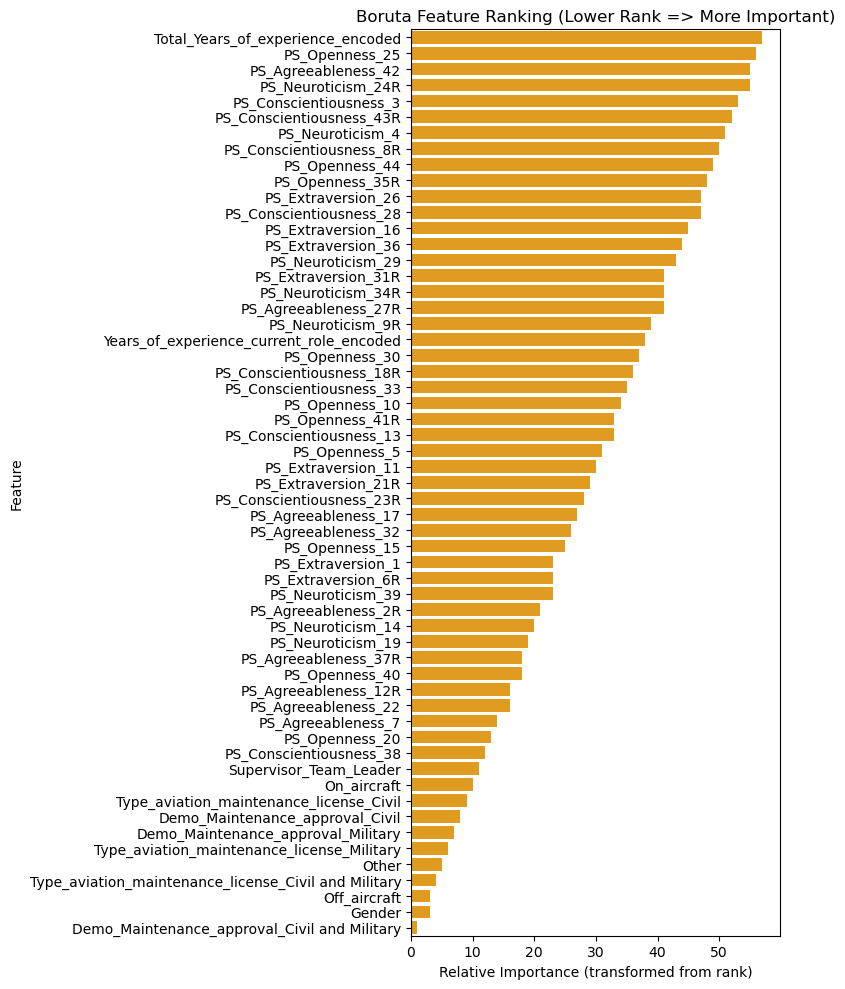

Boruta Confirmed Features:
['Total_Years_of_experience_encoded']


In [8]:
# -------------------------------
# Boruta for Feature Selection
# -------------------------------
rf_boruta = RandomForestClassifier(n_estimators=500, random_state=42)
boruta_selector = BorutaPy(
    estimator=rf_boruta,
    n_estimators='auto',
    max_iter=100,  # number of Boruta iterations
    random_state=42
)

# Boruta expects numpy arrays
boruta_selector.fit(X_train_scaled, y_train.values.ravel())

# Selected (important) features
selected_mask = boruta_selector.support_
selected_features = X.columns[selected_mask]

# Ranking gives 1 for confirmed, 2 for tentative, 3 for rejected
feature_ranks = boruta_selector.ranking_
feature_importance_boruta = -feature_ranks  # invert so that 1 => highest

# Sort features by Boruta rank (1 = best)
indices_boruta = np.argsort(feature_ranks)
sorted_features_boruta = X.columns[indices_boruta]
sorted_ranks_boruta = feature_ranks[indices_boruta]

# For visualization, we can invert or just show ranks
# Let's convert rank into an "importance" measure for a bar plot:
importance_boruta = np.max(feature_ranks) - feature_ranks + 1

# Sort in descending order of "importance"
sorted_importance_boruta = importance_boruta[indices_boruta]

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(8, 10))
sns.barplot(x=sorted_importance_boruta, y=sorted_features_boruta, color='orange')
plt.title("Boruta Feature Ranking (Lower Rank => More Important)")
plt.xlabel("Relative Importance (transformed from rank)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("Boruta Confirmed Features:")
print(selected_features.tolist())
